In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-dataset/Iris.csv
/kaggle/input/breast-canser/Breast_Cancer.csv


SVM, which stands for Support Vector Machine, is a powerful supervised learning algorithm primarily used for classification tasks, but it can also be employed for regression and outlier detection tasks. Here's a brief description of SVM:

1. **Objective**: The main objective of SVM is to find the hyperplane that best separates different classes in the feature space while maximizing the margin between classes.

2. **Margin**: The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin, as it leads to better generalization and robustness of the classifier.

3. **Support Vectors**: Support vectors are the data points that lie closest to the hyperplane. These are the critical elements used in defining the decision boundary of the classifier.

4. **Kernel Trick**: SVM can efficiently handle non-linear classification tasks by mapping the input features into a higher-dimensional space using kernel functions (e.g., polynomial kernel, radial basis function kernel). This allows SVM to find a linear decision boundary in the transformed space, even if the original feature space is not linearly separable.

5. **Regularization Parameters**: SVM includes regularization parameters like C (penalty parameter) and gamma (kernel coefficient), which help control overfitting and underfitting and influence the flexibility of the decision boundary.

6. **Binary Classification**: SVM is inherently a binary classifier, meaning it separates data into two classes. However, techniques like one-vs-one and one-vs-all can be used to extend SVM for multi-class classification problems.

7. **Robustness**: SVM is robust to overfitting, especially in high-dimensional spaces, due to its focus on maximizing margins and the use of support vectors.

Overall, SVM is a versatile and effective algorithm that works well for a wide range of classification tasks, particularly in scenarios where there's a clear margin of separation between classes.

**EXO2:SVM** 

***Partie 01:***
*Iris Data*

In [4]:
dataset=pd.read_csv('/kaggle/input/iris-dataset/Iris.csv')

In [5]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
dataset.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**drop the irrelevant features like ID** 

In [7]:
dataset=dataset.drop(columns=["Id"])

In [8]:
dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**split dataset into x and y**

In [9]:
X = dataset.drop(columns=['Species'])
print("independent variable \n",X)
y = dataset['Species'] 
print("dependent variable \n",y)

independent variable 
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
dependent variable 
 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-

**Split the X and Y dataset into the training set and test set**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

**Perform Feature Scaling (normalize the data within a particular range)**

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fit SVM to the Training set**

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',C=0.05, gamma='auto',random_state = 42)
classifier.fit(X_train, y_train)

SVC(C=0.05, gamma='auto', kernel='linear', random_state=42)

**Predict the Test Set Results**

In [13]:
y_pred = classifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


**Make the Confusion Matrix**

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix is : \n",cm)
accuracy_score(y_test,y_pred)

confusion matrix is : 
 [[21  0  0]
 [ 0 10  0]
 [ 0  1 13]]


0.9777777777777777

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :", grid_search.best_params_)

Meilleurs paramètres trouvés : {'C': 1, 'gamma': 'scale'}


**Kernel rbf**

In [16]:
from sklearn.svm import SVC
svm_rbf = SVC(C=0.006, kernel='rbf', gamma='scale')
svm_rbf.fit(X_train, y_train)


SVC(C=0.006)

In [17]:
y_pred_rbf = svm_rbf.predict(X_test)

**Kernel poly**

In [18]:
svm_poly = SVC(C=1, kernel='poly', gamma='auto', degree=7)
svm_poly.fit(X_train, y_train)


SVC(C=1, degree=7, gamma='auto', kernel='poly')

In [19]:
y_pred_poly = svm_poly.predict(X_test)

**Cancer Data**

*Load Cancer breast Cancer*

In [27]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
X_cancer, y_cancer = cancer_data.data, cancer_data.target

*Split data into test and train*

In [28]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

*Entraîner une SVM*

In [29]:
svm_cancer = SVC(kernel='linear')
svm_cancer.fit(X_train_cancer, y_train_cancer)

SVC(kernel='linear')

*Prédire le jeu de données test*

In [30]:
predictions_cancer = svm_cancer.predict(X_test_cancer)

*Afficher la matrice de confusion*

In [31]:
conf_matrix_cancer = confusion_matrix(y_test_cancer, predictions_cancer)
print("Matrice de confusion pour les données du cancer du sein:")
print(conf_matrix_cancer)

Matrice de confusion pour les données du cancer du sein:
[[ 59   4]
 [  2 106]]


**Exercice 1 : Régression**

Regression analysis is a statistical method used to model the relationship between one or more independent variables (predictors) and a dependent variable (response) in order to understand how the dependent variable changes as the independent variables vary. Here's a brief description:

1. **Objective**: The main objective of regression analysis is to estimate the relationship between variables, typically to make predictions or infer causal relationships.

2. **Types of Regression**: There are several types of regression techniques, including:
   - **Linear Regression**: A basic form of regression where the relationship between the independent and dependent variables is assumed to be linear.
   - **Polynomial Regression**: An extension of linear regression where the relationship is modeled as an nth-degree polynomial.
   - **Logistic Regression**: Used for binary classification tasks, where the dependent variable is categorical.
   - **Ridge Regression, Lasso Regression**: Regularized versions of linear regression used to prevent overfitting by adding penalty terms to the regression equation.
   - **Support Vector Regression (SVR)**: A regression algorithm based on support vector machines, used for both linear and nonlinear regression tasks.

3. **Model Building**: In regression analysis, a mathematical model is built based on the relationship between the independent and dependent variables. This model can then be used to make predictions on new data points.

4. **Assumptions**: Regression analysis relies on certain assumptions, such as linearity, independence of errors, homoscedasticity (constant variance of errors), and normality of errors.

5. **Evaluation**: Regression models are evaluated using various metrics depending on the task, such as mean squared error (MSE), R-squared (coefficient of determination), and others. These metrics help assess the goodness-of-fit and predictive performance of the model.

6. **Applications**: Regression analysis is widely used in various fields, including economics, finance, social sciences, engineering, and machine learning. It can be applied to tasks such as sales forecasting, risk assessment, medical diagnosis, and many others.

Overall, regression analysis is a fundamental statistical technique that provides insights into the relationships between variables and helps in making informed decisions and predictions based on data.

In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

(100, 1) (100,)


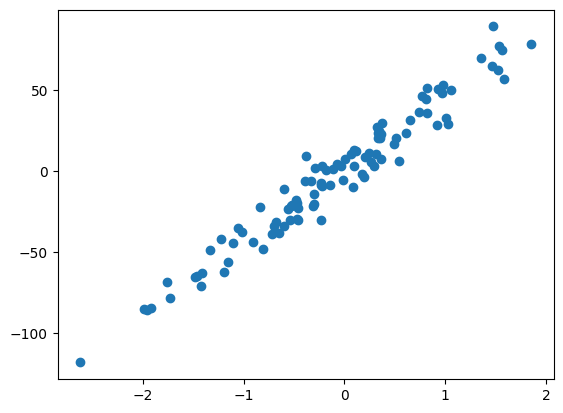

In [33]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
print(x.shape, y.shape)
plt.scatter(x,y)

In [34]:
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(x.shape)

(100, 1)


In [35]:
y =y.reshape(-1, 1)

In [36]:
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

In [37]:
def predict(x, theta):
    print('The shape', x.shape, theta.shape)
    return np.dot(x, theta)

In [38]:
predict(X, theta)
result = predict(X, theta) 
print( y.shape)
print(result.shape)

The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
(100, 1)
(100, 1)


The shape (100, 2) (2, 1)


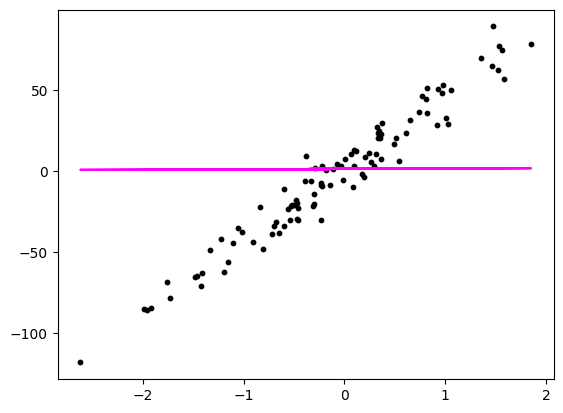

In [39]:
def visualise(X, y, theta):
    
    plt.scatter(X[:, 0], y, color='black', s=10)
    plt.plot(X[:, 0], predict(X, theta), color='magenta')
    plt.show()
    
    
visualise(X, y, theta)

In [41]:
def cost_function(X, y, theta):
    m = len(y)
    error = predict(X, theta) - y
    print('The error', error.shape)
    return 1/(2*m) * np.sum(error**2)

In [42]:
cost_function(X, y, theta)

The shape (100, 2) (2, 1)
The error (100, 1)


848.8733240285503

In [43]:
def get_gradient(X, y, theta):
    m = X.shape[0]

    error = predict(X, theta) - y
   
    return 1/m * (X.T@ error)

In [93]:
get_gradient(X, y, theta)

The shape (100, 2) (2, 1)


array([[-37.07689893],
       [  3.66976894]])

In [44]:
def gradient_descent(X = None, y= None, theta= None, learning_rate =0.01, n_iterations= 200):
    print(X.shape, y.shape, theta.shape)
    for _ in range(n_iterations):
        theta -= learning_rate * get_gradient(X, y, theta)
    return theta

In [45]:
gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=200)

(100, 2) (100, 1) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (100, 2) (2, 1)
The shape (10

array([[35.87724279],
       [-0.32000619]])

In [46]:
predict(X, theta)

The shape (100, 2) (2, 1)


array([[ 33.09175674],
       [  2.80300261],
       [-38.26775799],
       [ 10.95432165],
       [-17.51145666],
       [ 22.91727274],
       [-16.94615527],
       [ 19.14555222],
       [ 21.62525253],
       [ 35.68398723],
       [ 29.1675895 ],
       [ 54.86050512],
       [ 26.17413859],
       [ -8.20122785],
       [-29.32652748],
       [  2.97211746],
       [-70.62756701],
       [ 18.09461412],
       [ 36.66941399],
       [-94.30923733],
       [ 17.50072807],
       [  3.16286861],
       [-17.02910564],
       [ 32.52209783],
       [ 55.81509412],
       [ 52.26343053],
       [-21.8692663 ],
       [ -1.6053457 ],
       [-21.90758041],
       [-43.23660167],
       [ 12.49220824],
       [ 13.15900282],
       [  9.04593719],
       [-19.32634164],
       [-32.89740641],
       [  6.74283216],
       [-11.0475655 ],
       [ 12.65449728],
       [ 29.19063732],
       [-10.78517367],
       [ 12.64587169],
       [-24.60610115],
       [ 54.32210574],
       [-18

The shape (100, 2) (2, 1)


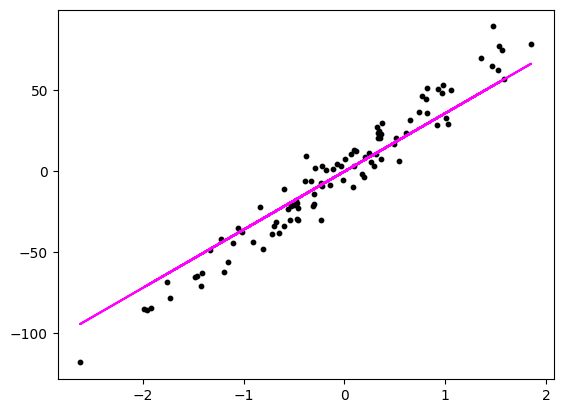

In [47]:
visualise(X, y, theta)